# Lab 01: Data pre-processing

- Student ID: 22120017
- Student name: Trương Tiến Anh

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (30%)!!! No late submissions will be accepted.</font>



### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [3]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [4]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [5]:
# Checking Python virtual env
sys.executable

'E:\\my_conda_envs\\min_ds-env2\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [6]:
# YOUR CODE HERE
raw_df = pd.read_csv("data/spaceX_laucnh.csv")

In [7]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [8]:
# YOUR CODE HERE
shape = raw_df.shape

In [9]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

**Mỗi dòng có ý nghĩa như nào?**
- Mỗi dòng trong bảng dữ liệu của `spaceX_laucnh.csv` đại diện cho một lần phóng tên lửa của SpaceX. Dữ liệu ghi lại thông tin chi tiết về từng lần phóng, bao gồm thời gian, loại tên lửa, tải trọng, địa điểm phóng và kết quả của nhiệm vụ.
  
**Có quan trọng không nếu các dòng có ý nghĩa khác nhau?**
- Nếu các dòng có ý nghĩa khác nhau, điều đó ảnh hưởng đến phân tích dữ liệu vì:
    - Khó hiểu & dễ nhầm lẫn -> Dữ liệu không đồng nhất làm sai lệch kết luận.
    - Kết quả không chính xác -> Dữ liệu không nhất quán dẫn đến phân tích sai.
    - Ảnh hưởng đến chất lượng dữ liệu -> Có thể chứa lỗi hoặc thiếu thông tin.
    - Tốn thời gian xử lý -> Phải làm sạch và đồng bộ dữ liệu trước khi phân tích.
    - Giảm độ tin cậy -> Dữ liệu không nhất quán làm giảm giá trị của phân tích.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [10]:
# YOUR CODE HERE
num_duplicated_rows = raw_df.duplicated().sum()

In [11]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [12]:
# YOUR CODE HERE
with open("data/metadata.json", "r", encoding="utf-8") as f:
    data = json.load(f)
attributes = data.get("attributions", {})
metadata = pd.DataFrame(attributes.items(), columns=["Attribute", "Description"])

In [13]:
# TEST
metadata

,Attribute,Description
0,uct_time,Launch date in UTC format.
1,launch_name,Launch name. Typically the name of the space mission.
2,payloads,The list information about the payloads on the launch.
3,rocket_name,The name of the rocket.
4,rocket_boosters,The number of boosters on the rocket.
5,rocket_height,The height information about the rocket (m).
6,rocket_diameter,The diameter information about the rocket (m).
7,rocket_mass,The mass information about the rocket (kg).
8,launchpad_name,The name of the launchpad.
9,launchpad_region,The region of the launchpad.


**TODO: Describe datatype**

| **Attribute**       | **Data Type**  |
|---------------------|---------------|
| uct_time           | datetime64     |
| launch_name        | object         |
| payloads           | object         |
| rocket_name        | object         |
| rocket_boosters    | int64          |
| rocket_height      | float64        |
| rocket_diameter    | float64        |
| rocket_mass        | float64        |
| launchpad_name     | object         |
| launchpad_region   | object         |
| launchpad_geo      | object         |
| landpad            | object         |
| landpad_name       | object         |
| landpad_type       | object         |
| landpad_region     | object         |
| landpad_geo        | object         |
| outcome            | Boolean        |

Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [14]:
# YOUR CODE HERE
dtypes_dict = {}
for column in raw_df.columns:
    dtypes_dict[column] = raw_df[column].dtype
dtypes = pd.DataFrame(dtypes_dict.items(), columns=["column name", "data type"]).set_index("column name")

In [15]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [16]:
# YOUR CODE HERE
raw_df["uct_time"] = pd.to_datetime(raw_df["uct_time"], utc=True)

In [17]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [18]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


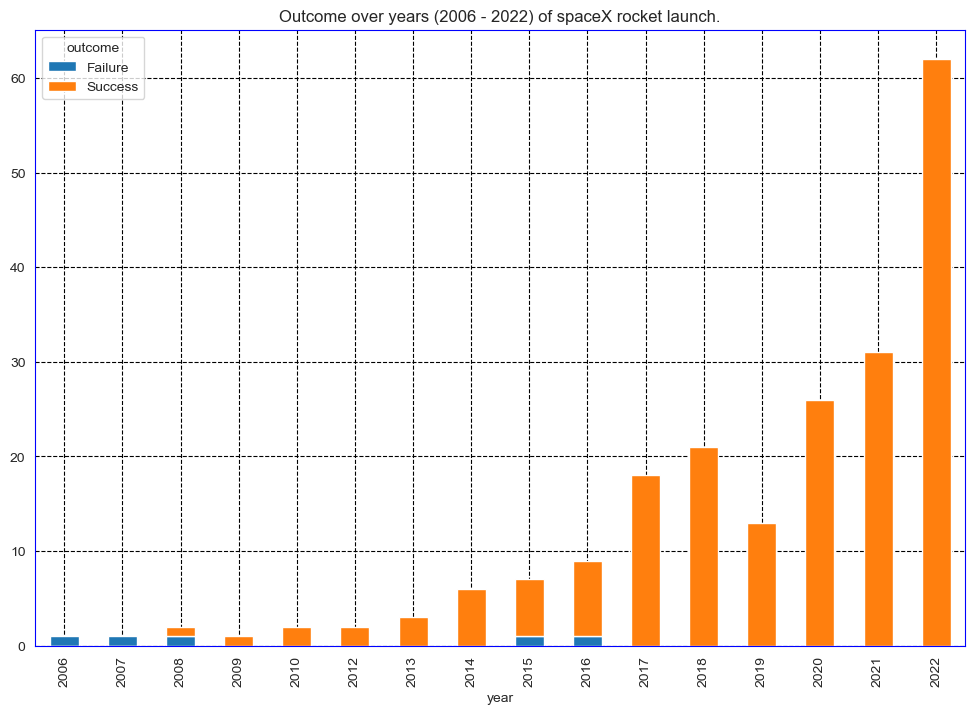

In [19]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

**Nhận xét**

Giai đoạn đầu (2006-2008):
- `SpaceX` gặp khá nhiều khó khắn trong việc phóng tên lửa, thể hiện ở số lần thất bại tương đối nhiều.
- Đây có thể là giai đoạn thử nghiệm và cải tiến công nghệ.

Giai đoạn phát triển (2009-2016):
- Số lần phóng tên lửa tăng dần theo các năm nhưng vẫn xuất hiện sự thất bại ở một số năm như 2015, 2016.
- Ta có thể nhận thấy sự thành công tăng nhanh bắt đầu từ 2014 trở đi.
  
Giai đoạn bùng nổ (2017-2022):
- Kể từ năm 2017 số lần phóng tăng mạnh, đánh giấu sự phát triển vượt bậc của ngành hàng không vũ trụ.
- Thành công chiếm phần lớn trong những lần phóng sau này, đỉnh điểm là vào năm 2022, điều này cũng đánh dấu sự hoàn thiện về mặt công nghệ của `SpaceX`.
  
Kết luận:
- `SpaceX` đã có những tiến bộ vượt bậc qua từng năm, từ thất bại cho đến bùng nổ thành công liên tiếp.
- Đánh dấu vai trò quan trọng và khẳng định vị thế của `SpaceX` trong nghành hàng không vũ trụ toàn cầu.

### Exploring numerical attributes

In [20]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [21]:
def missing_ratio(s):
    # TODO:
    return (s.isna().mean() * 100).round(1)

def median(df):
    # TODO:
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    # TODO:
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    # TODO:
    return (df.quantile(0.75)).round(1)

In [22]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [23]:
# YOUR CODE HERE
raw_df = raw_df.drop("landpad", axis=1)
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])

In [24]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [25]:
# YOUR CODE HERE
## Mean fill
for column in num_col_df.columns:
    new_column = "mean_fill_" + column
    num_col_df[new_column] = num_col_df[column].fillna(num_col_df[column].mean())  

In [26]:
# YOUR CODE HERE
## Median fill
for column in num_col_df.columns:
    new_column = "median_fill_" + column
    num_col_df[new_column] = num_col_df[column].fillna(num_col_df[column].median())

In [27]:
# YOUR CODE HERE
## Mode fill
for column in num_col_df.columns:
    new_column = "mode_fill_" + column
    num_col_df[new_column] = num_col_df[column].fillna(num_col_df[column].mode()[0])

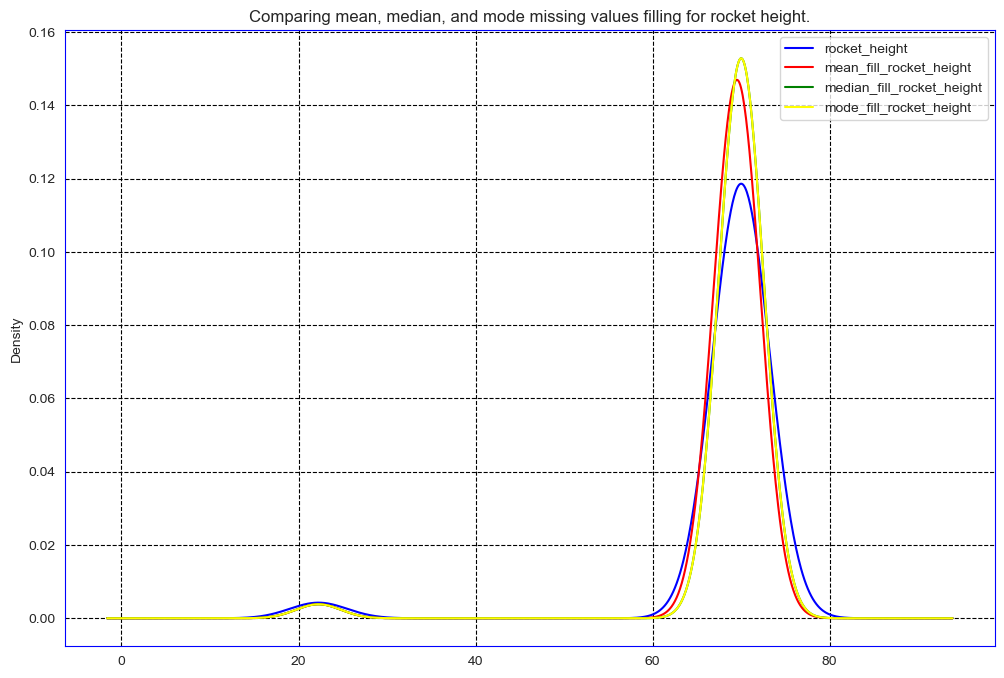

In [28]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

**Nhận xét**

Phân bố tổng thể:
- Nhìn chung các đường KDE có dạng phân bố tương tự nhau, cho thấy dữ liệu của `rocket_height` tập trung quanh một giá trị trung tâm.

Phân bố chi tiết:
- Đường màu xanh lá (median) và đường vàng (mode) gần như trùng nhau: điều này cho thấy trung vị (median) và mode của tập dữ liệu có giá trị tương đương. điều này có thể là do dữ liệu phân bố đối xứng hoặc mode không quá khác biệt so với median.

- Đường đỏ (mean) lệch nhẹ so với dữ liệu gốc: mean bị ảnh hưởng bới các giá trị ngoại lai (outliers), dẫn đến việc ta điền giá trị `NaN` bằng mean có thể dữ liệu sẽ bị lệch so với dữ liệu gốc. outliers càng nhiều, càng lớn thì độ lệch cũng tăng theo.

- Đường vàng (mode) và xanh lá (median) cao hơn so với đường đỏ (mean): điều này có thể là do mode và median tập trung vào khu vực giá trị phổ biến hơn, giúp dữ liệu ít bị ảnh hưởng bởi các giá trị cực đoan.

Kết luận:
- Nếu dữ liệu có ngoại lai, dùng median hoặc mode sẽ tốt hơn vì không bị ảnh hưởng nhiều.
- Nếu dữ liệu phân bố chuẩn thì mean là một lựa chọn phù hợp.
- Vì median và mode trùng nhau, có thể chọn median để đảm bảo độ ổn định

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [29]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    range_col = raw_df.groupby('rocket_name')['rocket_height'].agg(['min', 'max']).loc[rocket_name]
    return tuple(range_col)

In [30]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [31]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [32]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [33]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    height_map = df.groupby('rocket_name')['rocket_height'].transform(lambda x: x.fillna(checking_range(x.name)[0]))
    cp_df['rocket_height'] = height_map
    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [34]:
# YOUR CODE HERE
# Chọn mean fill cho cả 2 cột dữ liệu rocket_diameter và rocket_mass
raw_df['rocket_diameter'].fillna((raw_df['rocket_diameter'].mean()), inplace=True)
raw_df['rocket_mass'].fillna((raw_df['rocket_mass'].mean()), inplace=True)

In [35]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [36]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

| Thuộc tính         | Loại biến    | Giải thích |
|--------------------|-------------|------------|
|`rocket_boosters` | **Discrete**  | Số lượng booster chỉ nhận giá trị nguyên (0, 1, 2,...). |
|`rocket_height`   | **Continuous** | Chiều cao có thể là bất kỳ giá trị thực trong khoảng đo được. |
|`rocket_diameter` | **Continuous** | Đường kính có thể có giá trị thực bất kỳ. |
|`rocket_mass`     | **Continuous** | Khối lượng có thể có giá trị thực bất kỳ. |


### Exploring non-numerical attributes

In [37]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [38]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    if not s or s.strip() == "[]":
        return []
    
    s = s.replace("None", "null").replace("'", '"')

    temp = []
    try:
        temp = json.loads(s)
        if isinstance(temp, dict):
            temp = [temp]
    except json.JSONDecodeError:
        temp = []
    
    return temp

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [39]:
# TODO:
cate_col_df["payloads"] = cate_col_df["payloads"].apply(str2dict)
cate_col_df = cate_col_df.explode('payloads')

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [40]:
def missing_ratio(s):
    # TODO:
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    # TODO:
    return s.dropna().nunique()

def value_ratios(s):
    # TODO:
    return (
        s.value_counts(normalize=True)
        .mul(100)
        .round(1)
        .sort_values(ascending=True)
        .to_dict()
    )
    
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,1.4,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,NaN,3,4,3,4,6,3,2,5,2
value_ratios,"{'Starlink 4-26 (v1.5)': 0.5, 'JCSAT-2B': 0.5, 'CRS-8': 0.5, 'SES-9': 0.5, 'RatSat': 0.5, 'Razak...",NaN,"{'Falcon Heavy': 2.4, 'Falcon 1': 2.9, 'Falcon 9': 94.7}","{'Kwajalein Atoll': 2.9, 'VAFB SLC 4E': 14.4, 'KSC LC 39A': 27.8, 'CCSFS SLC 40': 55.0}","{'Marshall Islands': 2.9, 'California': 14.4, 'Florida': 82.8}","{'(9.0477206, 167.7431292)': 2.9, '(34.632093, -120.610829)': 14.4, '(28.6080585, -80.6039558)':...","{'JRTI-1': 1.3, 'LZ-4': 3.9, 'LZ-1': 11.8, 'ASOG': 13.8, 'JRTI': 27.0, 'OCISLY': 42.1}","{'Ocean': 4.4, 'RTLS': 15.1, 'ASDS': 80.5}","{'California': 46.4, 'Florida': 53.6}","{'(34.632989, -120.615167)': 2.9, '(28.485833, -80.544444)': 8.6, '(28.4104, -80.6188)': 20.6, '...","{'Failure': 2.9, 'Success': 97.1}"


In [41]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

**Nhận xét**

- Dựa vào tỷ lệ thiếu của các cột:
    - `landpad_name` (thiếu 27.3%)
    - `landpad_type` (thiếu 23.9%)
    - `landpad_region` (thiếu 47.4%)

- Tỷ lệ thiếu của cột `landpad_region` tương đối cao (>40%), ta vẫn chưa xác định được việc thiếu dữ liệu là nguyên nhân do đâu nên vẫn ưu tiên dữ lại phân tích, bởi việc thiếu dữ liệu cũng có thể là do tính chất của loại tên lửa. Nếu trong quá trình phân tích ta nhận thấy cột `landpad_region` bị thiếu do nhầm lẫn hoặc bị sai sót thì  nên xóa cột này để tránh làm sai lệch dữ liệu.

- Tỷ lệ thiếu `landpad_name` và `landpad_type` (<30%) vẫn còn nhiều giá trị hợp lệ. Do đó ta nên điền giá trị thiếu cho 2 cột này thay vì xóa.


Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [42]:
# TODO:
cate_col_df = cate_col_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], how='all')

In [43]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [44]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,30.8,0.0,0.0
num_values,158,NaN,2,3,2,3,6,3,2,5,2
value_ratios,"{'CRS-21': 0.6, 'Jason 3': 0.6, 'OG-2 Mission 1': 0.6, 'CRS-4': 0.6, 'CRS-5': 0.6, 'DSCOVR': 0.6...",NaN,"{'Falcon Heavy': 1.9, 'Falcon 9': 98.1}","{'VAFB SLC 4E': 15.7, 'KSC LC 39A': 32.1, 'CCSFS SLC 40': 52.2}","{'California': 15.7, 'Florida': 84.3}","{'(34.632093, -120.610829)': 15.7, '(28.6080585, -80.6039558)': 32.1, '(28.5618571, -80.577366)'...","{'JRTI-1': 1.3, 'LZ-4': 3.9, 'LZ-1': 11.8, 'ASOG': 13.8, 'JRTI': 27.0, 'OCISLY': 42.1}","{'Ocean': 4.4, 'RTLS': 15.1, 'ASDS': 80.5}","{'California': 46.4, 'Florida': 53.6}","{'(34.632989, -120.615167)': 3.8, '(nan, nan)': 4.4, '(28.485833, -80.544444)': 11.3, '(28.4104,...","{'Failure': 1.3, 'Success': 98.7}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

**Bảng so sánh**:

| Rocket Type        | Landpad Name | Landpad Type | Landpad Region | Launchpad Name    | Launchpad Region   |
|--------------------|-------------|-------------|----------------|-------------------|--------------------|
| **Falcon 1**      | NaN         | NaN         | NaN            | Kwajalein Atoll  | Marshall Islands  |
| **Falcon Heavy**  | OCISLY      | ASDS        | California     | KSC LC 39A       | Florida           |
| **Falcon 9**      | Most launch pads and launch regions are the same |


By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  | California  |
| JRTI  | ASDS  | Florida  |
| ASOG  |  ASDS |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | Florida |
| LZ-4  | RTLS  | California  |
| JRTI-1  | ASDS  | Florida  |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

- Falcon 9 có bệ phóng ở California và bệ hạ cánh ở Florida thì không có giá trị bị thiếu.
- Falcon 9 có bệ phóng ở California và bệ hạ cánh ở Florida. thì có tên bãi đáp và kiểu là JRTI và ASDS.
- Falcon 9 có bãi phóng ở Florida
   - Nếu hạ cánh trên biển (ASDS) -> Bãi đáp là OCISLY, ASOG hoặc JRTI.
   - Nếu hạ cánh trên đất liền (RTLS) -> Bãi đáp là LZ-1.
- Falcon 9 có bãi phóng ở California:
   - Nếu hạ cánh trên biển (ASDS) -> Bãi đáp là JRTI.
   - Nếu hạ cánh trên đất liền (RTLS) -> Bãi đáp là LZ-4.
- Falcon Heavy có bãi phóng ở Florida:
   - Nếu tăng cường đẩy quay lại đất liền -> Bãi đáp là LZ-1.
   - Nếu tăng cường đẩy quay lại biển -> Bãi đáp là OCISLY hoặc ASOG.
- Falcon 1 có bãi phóng ở Kwajalein Atoll (Marshall Islands): Không có bãi đáp vì Falcon 1 không có khả năng tái sử dụng.

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

- Falcon 9 có bãi đáp `LZ-1`, Loại bãi đáp là `RTLS` => Vùng `Florida`
- Falcon 9 có bãi đáp `LZ-4`, Loại bãi đáp là `RTLS` => Vùng `California`
- Falcon 9 có bãi đáp `JRTI-1`, Loại bãi đáp là `ASDS` => Vùng `Florida`
- Falcon Heavy có bãi đáp `LZ-1`, Loại bãi đáp là `RTLS` => Vùng `Florida`
- Falcon Heavy có bãi đáp `OCISLY`, Loại bãi đáp là `ASDS` => Vùng `California` hoặc `Florida`
- Falcon 1 không có bãi đáp vì không thể tái sử dụng

In [45]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    if (df is None):
        raise ValueError("Data frame rỗng")
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()

    # Từ những quan sát bên trên ta có thể rút ra được những quy tắc chung như sau
    landpad_info = {
        "OCISLY": {"type": "ASDS", "region": "California"},
        "JRTI": {"type": "ASDS", "region": "Florida"},
        "ASOG": {"type": "ASDS", "region": "Florida"},
        "LZ-1": {"type": "RTLS", "region": "Florida"},
        "LZ-4": {"type": "RTLS", "region": "California"},
        "JRTI-1": {"type": "ASDS", "region": "Florida"}
    }

    # Điền giá trị còn thiếu dựa trên landpad_name
    for landpad, info in landpad_info.items():
        mask = df_cp["landpad_name"] == landpad
        df_cp.loc[mask, "landpad_type"] = df_cp.loc[mask, "landpad_type"].fillna(info["type"])
        df_cp.loc[mask, "landpad_region"] = df_cp.loc[mask, "landpad_region"].fillna(info["region"])

    #Xóa những dòng bị thiếu landpad_name và landpad_region
    df_cp = df_cp.dropna(subset=['landpad_name', 'landpad_region'], how='all')
    return df_cp

cate_col_df = fill_landpadregion(cate_col_df)

In [46]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'NROL-108': 0.7, 'CRS-11': 0.7, 'CRS-7': 0.7, 'OG-2 Mission 2': 0.7, 'Jason 3': 0.7, 'SES-9': 0...",NaN,"{'Falcon Heavy': 2.0, 'Falcon 9': 98.0}","{'VAFB SLC 4E': 15.1, 'KSC LC 39A': 33.6, 'CCSFS SLC 40': 51.3}","{'California': 15.1, 'Florida': 84.9}","{'(34.632093, -120.610829)': 15.1, '(28.6080585, -80.6039558)': 33.6, '(28.5618571, -80.577366)'...","{'JRTI-1': 1.3, 'LZ-4': 3.9, 'LZ-1': 11.8, 'ASOG': 13.8, 'JRTI': 27.0, 'OCISLY': 42.1}","{'RTLS': 15.8, 'ASDS': 84.2}","{'California': 46.1, 'Florida': 53.9}","{'(34.632989, -120.615167)': 3.9, '(28.485833, -80.544444)': 11.8, '(28.4104, -80.6188)': 28.3, ...","{'Failure': 1.3, 'Success': 98.7}"


In [47]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [48]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE
# Tách thuộc tính trong cột payloads
raw_df = raw_df.explode("payloads")

#Xóa những dòng bị thiếu landpad_name, landpad_type và landpad_region
raw_df = raw_df.dropna(subset=['landpad_name', 'landpad_type', 'landpad_region'], how='all')
raw_df = fill_landpadregion(raw_df)

In [49]:
# TEST 01
assert raw_df.shape == (152, 16)

In [50]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,NaN,2,3,2,3,6,2,2,4,2
value_ratios,"{'NROL-108': 0.7, 'CRS-11': 0.7, 'CRS-7': 0.7, 'OG-2 Mission 2': 0.7, 'Jason 3': 0.7, 'SES-9': 0...",NaN,"{'Falcon Heavy': 2.0, 'Falcon 9': 98.0}","{'VAFB SLC 4E': 15.1, 'KSC LC 39A': 33.6, 'CCSFS SLC 40': 51.3}","{'California': 15.1, 'Florida': 84.9}","{'(34.632093, -120.610829)': 15.1, '(28.6080585, -80.6039558)': 33.6, '(28.5618571, -80.577366)'...","{'JRTI-1': 1.3, 'LZ-4': 3.9, 'LZ-1': 11.8, 'ASOG': 13.8, 'JRTI': 27.0, 'OCISLY': 42.1}","{'RTLS': 15.8, 'ASDS': 84.2}","{'California': 46.1, 'Florida': 53.9}","{'(34.632989, -120.615167)': 3.9, '(28.485833, -80.544444)': 11.8, '(28.4104, -80.6188)': 28.3, ...","{'Failure': 1.3, 'Success': 98.7}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [51]:
# cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2 = cate_col_df.reset_index().join(pd.DataFrame(cate_col_df['payloads'].tolist()).reset_index(drop=True)).drop('payloads', axis=1)  
cate_col_df2

,index,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,18,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,21,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,23,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,24,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,25,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,182,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,183,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,184,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,185,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [52]:
# YOUR CODE HERE
#Chỉ dữ lại các dòng có 2 gái trị hợp lệ trở lên
cate_col_df2 = cate_col_df2.dropna(subset=['type', 'mass', 'orbit'] , thresh = 2)

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [53]:
# YOUR CODE HERE
drop_idx = cate_col_df2.loc[cate_col_df2["mass"].isnull()].index

In [54]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [55]:
cate_col_df2.drop(drop_idx, inplace=True)

In [56]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285 
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [57]:
# Step 01: unpack `payloads`
# raw_df = raw_df.join(pd.DataFrame(raw_df['payloads'].tolist())).drop('payloads', axis=1) 
raw_df = raw_df.reset_index().join(pd.DataFrame(raw_df['payloads'].tolist()).reset_index(drop=True)).drop('payloads', axis=1)  

In [58]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
raw_df.rename(columns={'type': 'payloads_type', 'mass': 'payloads_mass', 'orbit': 'payloads_orbit'}, inplace=True)

In [59]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
raw_df = raw_df.dropna(subset=['payloads_type', 'payloads_mass', 'payloads_orbit'], thresh = 2)

In [60]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
drop_idx = raw_df.loc[raw_df["payloads_mass"].isnull()].index
raw_df.drop(drop_idx, inplace=True)

In [61]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997 

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [62]:
# TEST
raw_df.head()

,index,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [63]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    s = s.strip("()")  
    if not s:  
        return ()
    result = tuple(float(i.strip()) for i in s.split(","))
    return result

In [64]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [65]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [66]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,index,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,18,2015-01-10 09:47:00+00:00,CRS-5,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,21,2015-04-14 20:10:00+00:00,CRS-6,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,23,2015-06-28 14:21:00+00:00,CRS-7,Falcon 9,0,70.0,3.7,556404.541667,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,24,2015-12-22 01:29:00+00:00,OG-2 Mission 2,Falcon 9,0,70.0,3.7,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,25,2016-01-17 15:42:00+00:00,Jason 3,Falcon 9,0,70.0,3.7,549054.000000,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `nominal` attributes, you should use `one hot encoding`, and for `ordinal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

- `launch_name` là **nominal**

In [67]:
# YOUR CODE HERE
raw_df_temp = raw_df.copy()
raw_df = pd.get_dummies(raw_df, columns=['launch_name'])

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

- `rocket_name` là **nominal**

In [68]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['rocket_name'])

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

- `launchpad_name` là **nominal**

In [69]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_name'])

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

- `launchpad_region` là **nominal**

In [70]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['launchpad_region'])

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

- `landpad_name` là **nominal**

In [71]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_name'])

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

- `landpad_type` là **ordinal**

In [72]:
# YOUR CODE HERE
le = LabelEncoder()
raw_df["landpad_type"] = le.fit_transform(raw_df["landpad_type"])

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

- `landpad_region` là **nominal**

In [73]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['landpad_region'], dtype=int)

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

- `outcome` là **ordinal**

In [74]:
# YOUR CODE HERE
le = LabelEncoder()
raw_df["outcome"] = le.fit_transform(raw_df["outcome"])

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

- `payloads_type` là **nominal**

In [75]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_type'], dtype=int)

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

- `payloads_orbit` là **nominal**

In [76]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=['payloads_orbit'], dtype=int)

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [77]:
# YOUR CODE HERE
cols_to_convert = ['launchpad_geo_x', 'launchpad_geo_y', 'landpad_geo_x', 'landpad_geo_y', 'payloads_mass']
raw_df[cols_to_convert] = raw_df[cols_to_convert].apply(pd.to_numeric, downcast="float")

TODO: Find different methods to encode categorical attributes.

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [78]:
raw_df.head()

,index,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad_type,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,laun

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

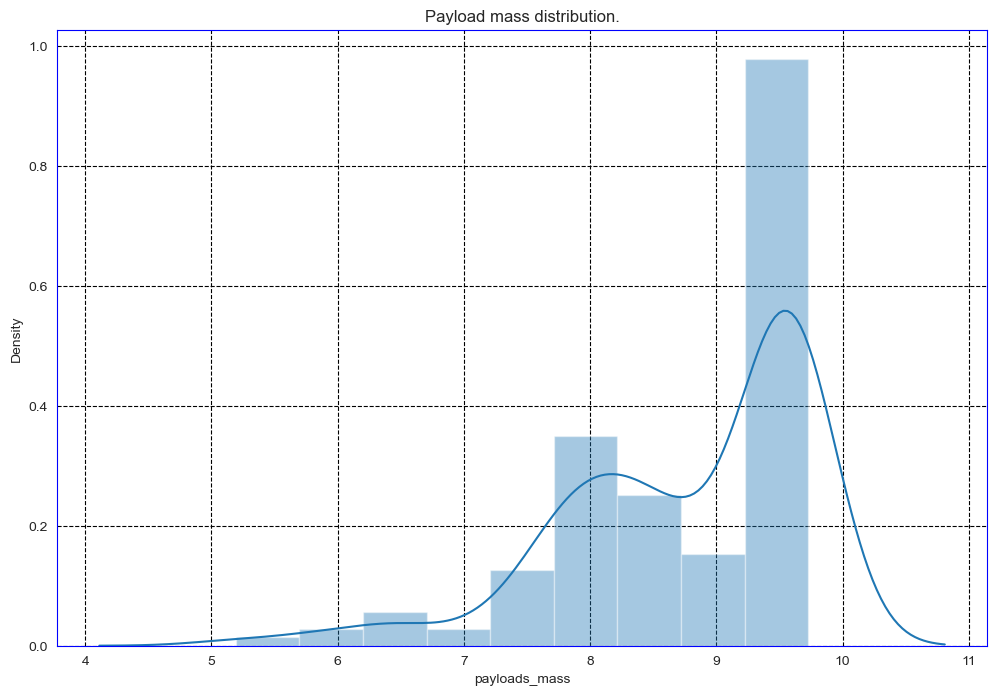

In [79]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [80]:
# YOUR CODE HERE
min_mass, max_mass = raw_df["payloads_mass"].agg(['min', 'max'])
mass_range = max_mass - min_mass

In [81]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [82]:
# YOUR CODE HERE
lower_interval = int(np.floor(min_mass))
upper_interval = int(np.ceil(max_mass))

In [83]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [84]:
# YOUR CODE HERE
interval_size = mass_range / 4
total_bins = np.linspace(lower_interval, upper_interval, num=5)

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [85]:
# YOUR CODE HERE
labels = ['bin_no_' + str(i) for i in range(1,len(total_bins))]

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [86]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(raw_df['payloads_mass'], bins=total_bins, labels=labels)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

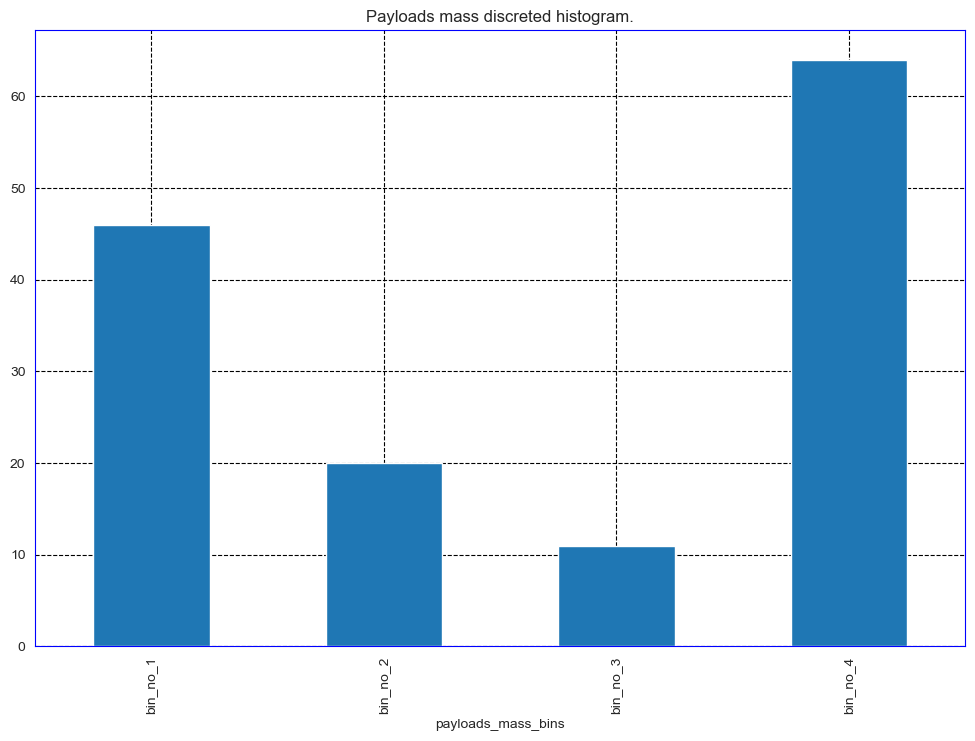

In [87]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

**Nhận xét**

Dữ liệu trên được phân chia thành 4 bin:
- `bin_no_1`, `bin_no_2`, `bin_no_3`, `bin_no_4` đại diện cho sự phân bổ các giá gị trong từng bin của `payloads_mass`
- Số lượng mẫu trong mỗi bin được thể hiện bằng chiều cao

Sự phân bố không đồng đều:
- Bin số 4 (`bin_no_4`) chưa số lượng lớn nhất, điều này thể hiện giá trị của `payloads_mass` tập trung ở bin này là nhiều nhất
- Bin số 2, 3 (`bin_no_2` và `bin_no_3`) chưa số lượng ít nhất, điều này thể hiện giá trị của `payloads_mass` ít rơi vào các khoảng này

Dữ liệu có thể bị lệch (`skewed distribution`):
- Nếu nhìn vào hình dạng phân bố, có thể dữ liệu bị lệch (`skewed`) về một phía, cụ thể là nghiêng về bin số 4.
- Điều này có thể gợi ý rằng phần lớn `payloads_mass` nằm ở giá trị cao, trong khi số lượng nhỏ hơn nằm ở giá trị thấp.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [88]:
# YOUR CODE HERE
equal_frequency, total_bins = pd.qcut(raw_df["payloads_mass"], q=4, labels=False, retbins=True)

- Step 02: Create bin labels

In [89]:
# YOUR CODE HERE
labels = ["bin_no_" + str(i) for i in range(1, len(total_bins))]

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [90]:
# YOUR CODE HERE
raw_df["payloads_mass_bins"] = pd.cut(raw_df["payloads_mass"], bins=total_bins, labels=labels, include_lowest=True)

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

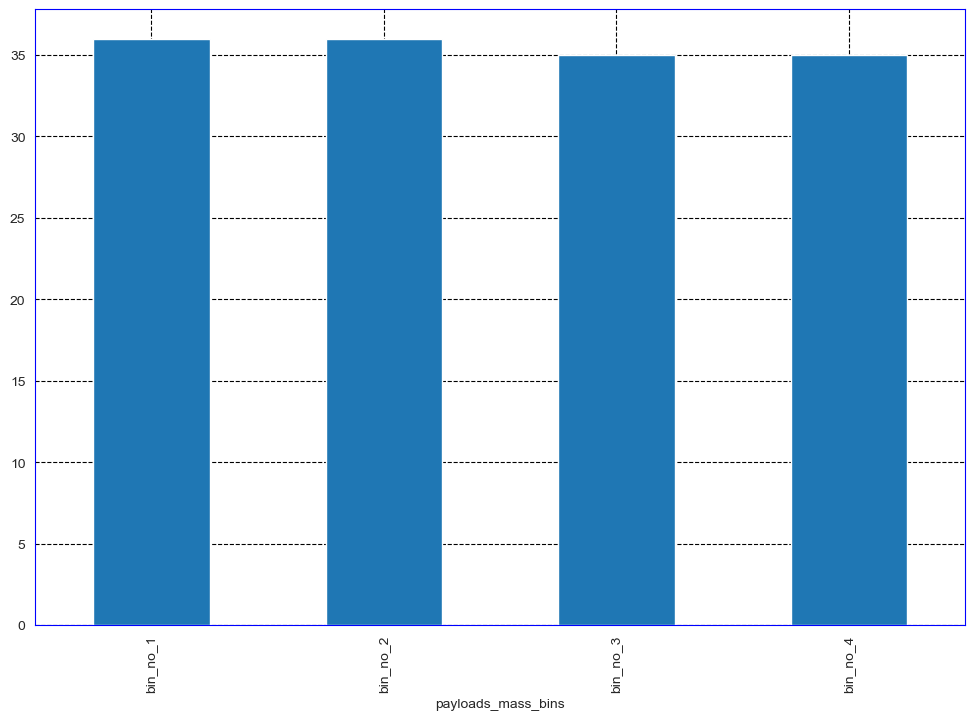

In [91]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

---

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

**K-Means Discretization**

Khái niệm:
- Dựa trên thuật toán K-Means Clustering để chia tập dữ liệu liên tục thành các nhóm (bins).
- Các điểm dữ liệu trong một bin sẽ có giá trị gần nhau hơn so với các bin khác.

Quy trình thực hiện:
- Bước 1: Áp dụng thuật toán K-Means để phân cụm dữ liệu thành k nhóm.
- Bước 2: Tính giá trị trung bình của từng nhóm để đại diện cho toàn bộ nhóm đó.
- Bước 3: Gán từng điểm dữ liệu vào nhóm gần nhất dựa trên khoảng cách đến trung bình của mỗi nhóm.

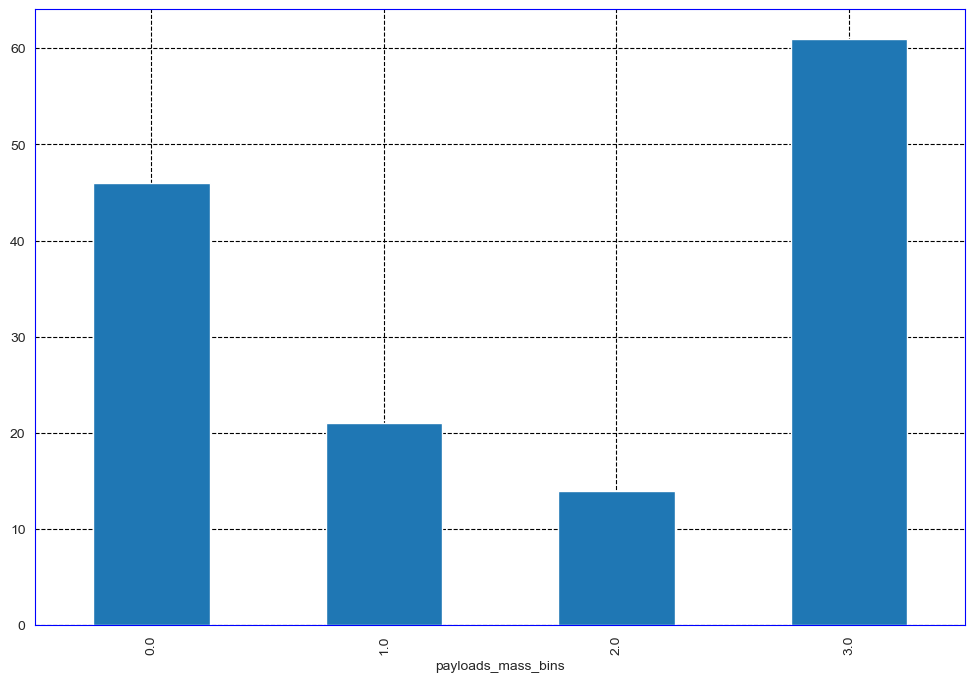

In [92]:
# YOUR CODE HERE (Optional)
# K-Means Discretization
kmeans = KBinsDiscretizer(n_bins=4, strategy='kmeans', encode='ordinal')
raw_df["payloads_mass_bins"] = kmeans.fit_transform(raw_df[['payloads_mass']])

#Visualiazation
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Nhận xét**

- Ta thấy các nhóm (`0.0`, `1.0`, `2.0`, `3.0`) không có số lượng phần tử hoàn toàn bằng nhau. Điều này là do K-Means chia dữ liệu dựa trên sự tương đồng.
- Nhóm `2.0` có số lượng thấp hơn hẳn, có thể là do dữ liệu bị lệch hoặc có các cụm nhỏ hơn trong dữ liệu gốc
  

---

**Decision Tree Discretization**

Khái niệm:
- Dựa trên Decision Tree (Cây quyết định) để tìm ra điểm cắt tối ưu và chia dữ liệu thành các bins.
- Tận dụng việc tìm các điểm chia (splitting points) để tối ưu hóa độ thuần khiết (purity) của dữ liệu.

Quy trình thực hiện:
- Bước 1: Huấn luyện một cây quyết định có độ sâu giới hạn (thường là 2, 3 hoặc 4) bằng cách sử dụng biến cần rời rạc hóa để dự đoán nhãn mục tiêu.
- Bước 2: Thay thế các giá trị ban đầu của biến đó bằng xác suất dự đoán do cây quyết định cung cấp. Các điểm dữ liệu thuộc cùng một khoảng sẽ có cùng xác suất, tức là được nhóm vào cùng một bin theo cách mà cây quyết định xác định.

Triển khai cụ thể:
- Chọn biến `X` (feature): `payloads_mass` (khối lượng hàng hóa phóng lên).
- Chọn biến `y` (target): `outcome` (kết quả phóng thành công hay thất bại).
- Chọn `max_depth` = 3 để kiểm soát độ phức tạp của mô hình và tránh overfitting
- Ta sẽ sử dụng Decision Tree để rời rạc hóa `payloads_mass` dựa trên `outcome`

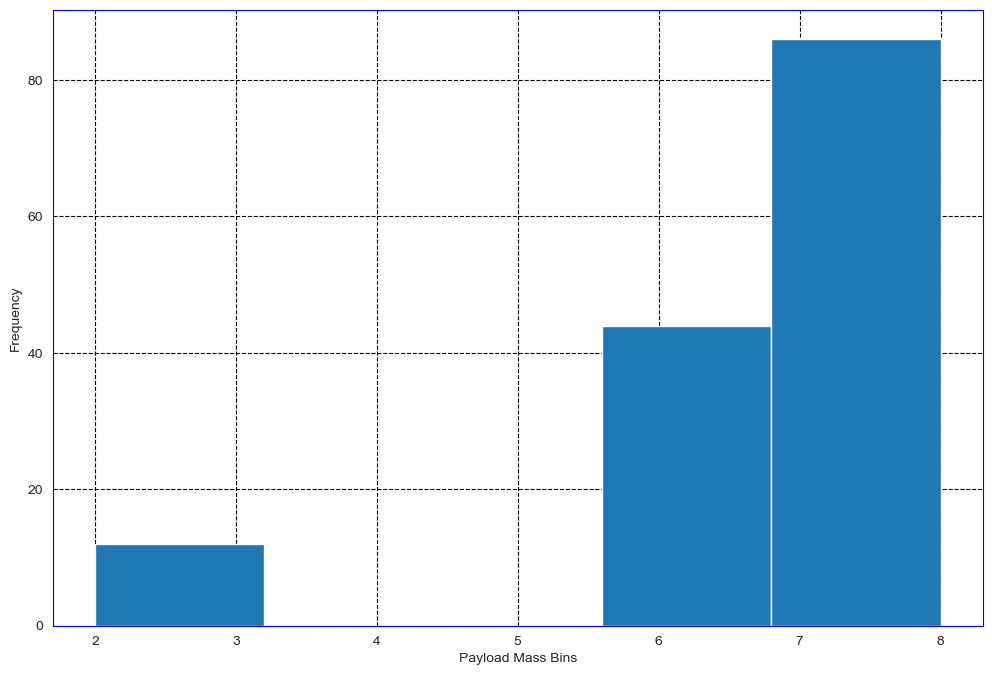

In [93]:
# YOUR CODE HERE (Optional)
# Decision Tree Discretization
df = raw_df_temp[['payloads_mass', 'outcome']].copy()

# Chuyển outcome về dạng số (Success = 1, Failure = 0)
df['outcome'] = df['outcome'].map({'Success': 1, 'Failure': 0})

X = df[['payloads_mass']]
y = df['outcome']

# Dùng DecisionTreeClassifier để chia nhóm payloads_mass
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

df['payloads_mass_bins'] = tree.apply(X)

# Visualization
plt.hist(df['payloads_mass_bins'], bins=len(df['payloads_mass_bins'].unique()))
plt.xlabel("Payload Mass Bins")
plt.ylabel("Frequency")
plt.show()

**Nhận xét**
- Ta thấy các nhóm bins có số lượng mẫu rất khác nhau
- Có bins rất ít dữ liệu (bin 2-3.1) trong khi bin cao nhất (6.8 - 8.0) có hơn 80 mẫu
- Thiếu tính liên tục có thể là do chia bins chưa hợp lý
- Do dữ liệu bị ảnh hưởng bởi cách Decision Tree chia nhóm. Nếu chọn ngưỡng không hợp lý có thể dẫn đến một số bins có quá ít hoặc quá nhiều điểm dữ liệu
- Nếu tiếp tục tối ưu ta nên chọn `max_depth` của DecisionTreeClassifier phù hợp hơn
  

---

In [94]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

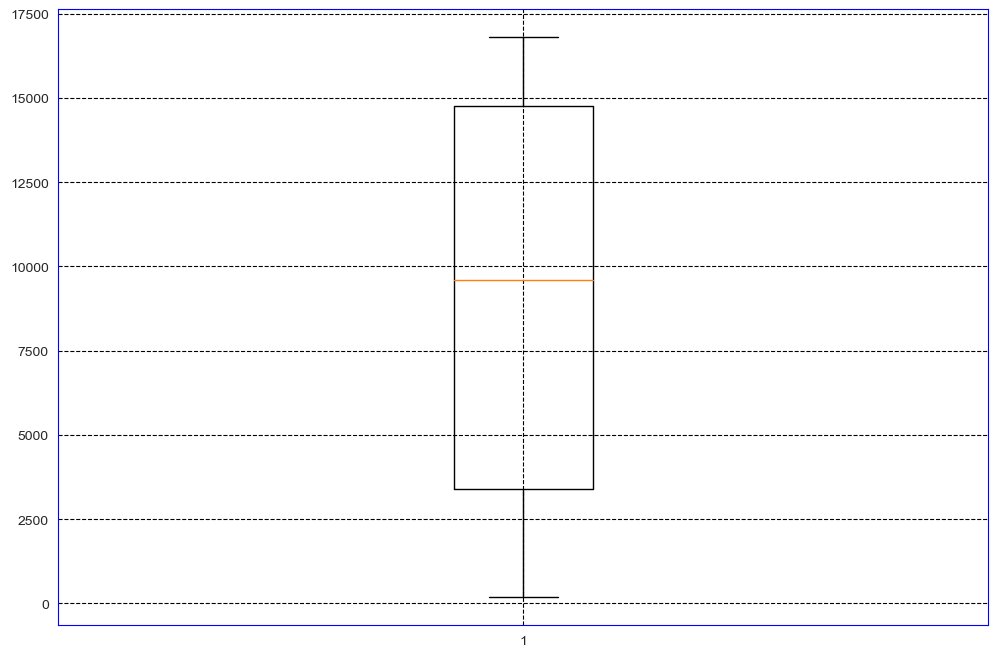

In [95]:
# YOUR CODE HERE
plt.boxplot(raw_df['payloads_mass'])
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [96]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [97]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [98]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 184), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

**Advantages**
- Cải thiện hiệu suất mô hình: bởi vì outliers có thể gây nhiễu cho mô hình, đặc biệt là với các thuật toán nhạy cảm như hồi quy tuyến tính hoặc phân cụm k-means. Khi ta loại bỏ chúng, mô hình có thể học được xu hướng tổng thể của dữ liệu tốt hơn.

- Giúp phân phối dữ liệu cân đối hơn: bởi vì nếu dữ liệu bị lệch do outliers, việc loại bỏ chúng có thể giúp phân phối trở nên bình thường hơn, từ đó cải thiện các phân tích thống kê.

- Loại bỏ dữ liệu nhiễu: bởi vì một số outliers có thể là lỗi đo lường hoặc nhập sai, làm sai lệch kết quả phân tích. Việc cắt bỏ giúp dữ liệu sạch hơn và đáng tin cậy hơn.

- Tăng tốc độ tính toán bởi: vì các mô hình dựa trên khoảng cách như kNN hoặc SVM có thể bị ảnh hưởng bởi các điểm dữ liệu quá lớn hoặc quá nhỏ. Việc loại bỏ chúng giúp giảm khối lượng tính toán và tăng tốc độ huấn luyện.

**Disadvantages**
- Mất thông tin quan trọng bởi vì đôi khi outliers có ý nghĩa thực tế. Nếu loại bỏ, ta có thể mất đi những đặc điểm quan trọng.

- Không phải lúc nào cũng cần thiết bởi vì một số thuật toán như Random Forest hoặc Gradient Boosting ít bị ảnh hưởng bởi outliers. Nếu mô hình có thể xử lý tốt outliers, việc loại bỏ có thể không mang lại lợi ích đáng kể.

- Dễ làm dữ liệu bị thiên lệch bởi vì nếu cắt bỏ outliers mà không cân nhắc kỹ, tập dữ liệu có thể bị mất cân bằng, dẫn đến sai lệch trong dự đoán hoặc phân tích.

- Không có tiêu chuẩn cố định để xác định outliers bởi vì ngưỡng loại bỏ thường dựa vào kinh nghiệm, chẳng hạn như sử dụng IQR (1.5 * khoảng tứ phân vị) hoặc số lần độ lệch chuẩn. Điều này có thể dẫn đến quyết định chủ quan và không phải lúc nào cũng tối ưu.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

**Trả lời**

Khoảng cách thường được sử dụng để xác định outliers bằng IQR (Interquartile Range) là `1.5 * IQR`.

Giải thích:
- IQR là khoảng giữa Q1 (quartile thứ 1) và Q3 (quartile thứ 3).
- Nó đo độ phân tán của dữ liệu trong khoảng 50% trung tâm.
- Các điểm dữ liệu nhỏ hơn Q1 - 1.5 * IQR hoặc lớn hơn Q3 + 1.5 * IQR thường được coi là outliers.
  
Lý do:
- Khoảng này giúp lọc bỏ những điểm dữ liệu quá xa so với phân bố chung.
- Phương pháp này không giả định dữ liệu có phân phối chuẩn, phù hợp với nhiều loại dữ liệu thực tế.
  
Công thức:
- `Lower Bound=Q1−1.5×IQR`
- `Upper Bound=Q3+1.5×IQR`
  
Dữ liệu nằm ngoài khoảng này thường bị coi là outliers và có thể bị loại bỏ hoặc điều chỉnh. 

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [99]:
# YOUR CODE HERE
mean = raw_df["payloads_mass"].mean()
sigma = raw_df["payloads_mass"].std()
upper_bound = mean + 3 * sigma
lower_bound = mean - 3 * sigma
print(f"The lower bound for payloads limitation: {lower_bound}")
print(f"The upper bound for payloads limitation: {upper_bound}")

The lower bound for payloads limitation: -7879.7822265625
The upper bound for payloads limitation: 26099.5244140625


- Step 02: Construct rule for trimming outliers.

In [100]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [101]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 184), (142,))

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

**Trả lời**

**Advantages**
- Dễ tính toán: Mean và Standard Deviation có sẵn trong hầu hết thư viện dữ liệu.
- Hiệu quả khi dữ liệu chuẩn: Xác định outliers tốt nếu dữ liệu có phân phối chuẩn.
- Tối ưu cho mô hình tuyến tính: Giúp cải thiện hiệu suất hồi quy tuyến tính.
  
**Disadvantages**
- Không phù hợp khi dữ liệu bị lệch: Mean dễ bị ảnh hưởng bởi outliers.
- Kém hiệu quả với dữ liệu có đuôi dài: Độ lệch chuẩn cao làm mất đi ý nghĩa của ngưỡng.
- Có thể loại bỏ dữ liệu quan trọng: Nếu không cân nhắc, có thể mất thông tin giá trị.
  
**What is the quartile distance normally used to cap outliers via mean and standard deviation?**

Mean `+-` 3 * Standard Deviation
- Trong phân phối chuẩn, khoảng **Mean `+-` 3 * Standard Deviation** chứa khoảng **99%** dữ liệu.
- Các điểm dữ liệu nằm ngoài khoảng này thường được coi là outliers.
- Vì outliers chiếm tỷ lệ rất nhỏ trong dữ liệu, loại bỏ chúng sẽ không ảnh hưởng nhiều đến tổng thể tập dữ liệu.

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [102]:
# YOUR CODE HERE
upper_bound = raw_df["payloads_mass"].quantile(0.9)
lower_bound = raw_df["payloads_mass"].quantile(0.1)
print(f"The lower bound for payloads: {lower_bound}")
print(f"The upper bound for payloads: {upper_bound}")

The lower bound for payloads: 2200.0
The upper bound for payloads: 15600.0


- Step 02: Construct rule for trimming outliers.

In [103]:
# YOUR CODE HERE
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_bound,
    True,
    np.where(raw_df["payloads_mass"] < lower_bound, True, False),
)

- Step 03: Trimming outliers

In [104]:
# YOUR CODE HERE
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 184), (142,))

TODO: What are the advantages and disadvantages of using Quantiles?

**Trả lời**

**Advantages**
- Dễ tính toán: Chỉ cần xác định ngưỡng như Q10 và Q90.
- Không bị ảnh hưởng bởi phân phối: Hoạt động tốt với dữ liệu bị lệch.
- Bảo toàn dữ liệu: Không loại bỏ cực đoan quá mạnh như độ lệch chuẩn.
  
**Disadvantages**
- Có thể bỏ sót outliers nếu dùng ngưỡng cố định.
- Không linh hoạt khi dữ liệu thay đổi đáng kể.
- Có thể loại bỏ điểm dữ liệu quan trọng do vượt ngưỡng định trước.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [105]:
scaler = StandardScaler()

- Step 02: Fitting

In [106]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [107]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [108]:
raw_df_scaled.head()

,index,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad_type,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_T

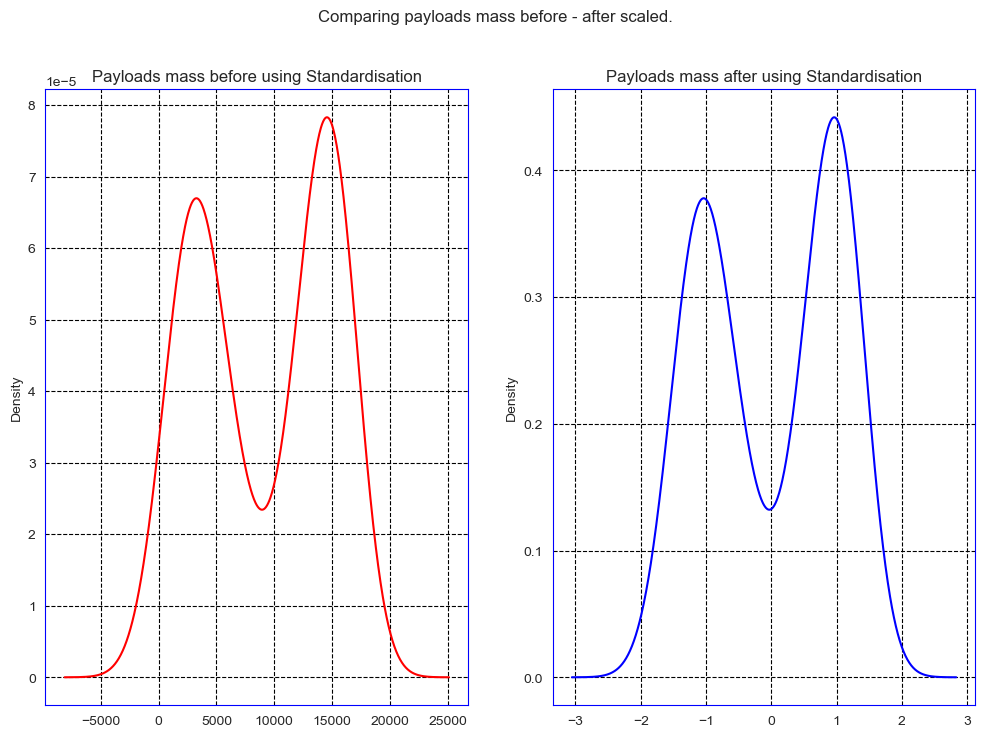

In [109]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

**Nhận xét**

- Hình dạng phân phối tương tự nhau: Hai đồ thị có hình dạng tương tự, cho thấy quá trình chuẩn hóa không làm thay đổi phân bố dữ liệu, chỉ thay đổi phạm vi giá trị.
  
- Trước khi chuẩn hóa (trái): Giá trị payloads_mass có phạm vi lớn, trải dài từ khoảng -5000 đến hơn 25000, dẫn đến sự chênh lệch lớn giữa các quan sát.
  
- Sau khi chuẩn hóa (phải): Dữ liệu được đưa về phân phối chuẩn với trung bình khoảng 0 và độ lệch chuẩn 1. Điều này giúp các thuật toán máy học hoạt động hiệu quả hơn, đặc biệt là các thuật toán nhạy cảm với khoảng giá trị như hồi quy tuyến tính, KNN, SVM.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

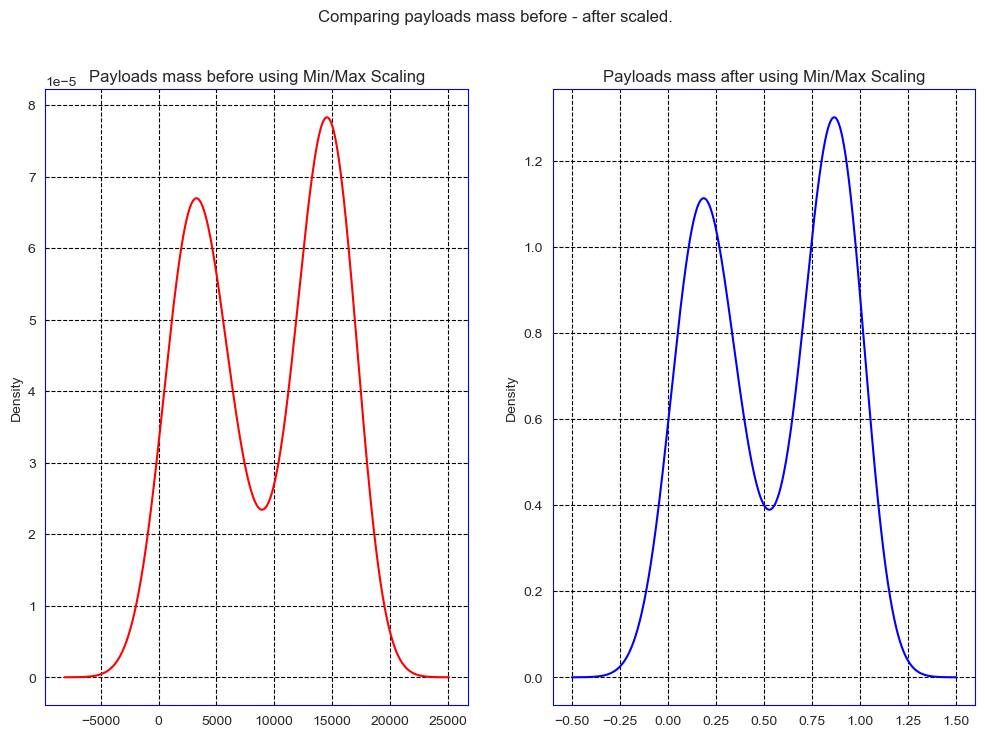

In [110]:
# YOUR CODE HERE
scaler = MinMaxScaler()
scaler.fit(raw_df[["payloads_mass"]])

raw_df_scaled = scaler.transform(raw_df[["payloads_mass"]])
raw_df_scaled = pd.DataFrame(raw_df_scaled,  columns=["payloads_mass"])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Min/Max Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Min/Max Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Nhận xét**

- Phân bố dữ liệu giữ nguyên, nhưng phạm vi giá trị thu hẹp lại. Trước khi chuẩn hóa, giá trị dao động từ 5.000 đến 25.000, sau đó chỉ còn -0.5 đến 1.5. Mật độ giá trị tăng lên sau khi chuẩn hóa.
- Biểu đồ trước chuẩn hóa cho thấy giá trị tập trung nhiều quanh 14.000, sau chuẩn hóa tương ứng khoảng 0.9. Điều này cho thấy Min/Max Scaling thu hẹp phạm vi mà không làm thay đổi hình dạng phân bố.
- So với Standardization, Min/Max Scaling tạo phạm vi nhỏ hơn nhưng giá trị trên trục y phân bố rộng hơn.
- Phù hợp khi cần đưa dữ liệu về một thang đo chung để tránh ảnh hưởng của đơn vị đo lường trong các thuật toán như KNN, Gradient Descent, Neural Networks.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

*Give your obervation here*
| Tiêu chí  | Mean Normalization  |  Min/Max Scaling |
|---|---|---|
| **Công thức** |  $x' = \frac{x - \text{mean}(X)}{\max(X) - \min(X)}$  | $x' = \frac{x - \min(X)}{\max(X) - \min(X)}$ |
| **Mục tiêu**  | Giúp dữ liệu có trung bình 0, phù hợp khi muốn dữ liệu có phân phối chuẩn.  | Đưa dữ liệu về khoảng [0,1] hoặc [-1,1], giúp dễ so sánh giữa các đặc trưng có đơn vị khác nhau. |
| **Ảnh hưởng đến phân phối**  | Có thể giúp dữ liệu gần với phân phối chuẩn hơn.  | Không làm thay đổi hình dạng phân phối gốc. |
| **Độ nhạy với outliers**  | Giảm ảnh hưởng của outliers do chuẩn hóa dựa trên trung bình.  | Dễ bị ảnh hưởng bởi outliers do phụ thuộc vào giá trị min/max. |
| **Ứng dụng phù hợp**  | Khi dữ liệu có phân phối lệch và muốn đưa về phân phối chuẩn.  | Khi cần giữ nguyên phân bố dữ liệu và đưa về một phạm vi cố định. |


TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

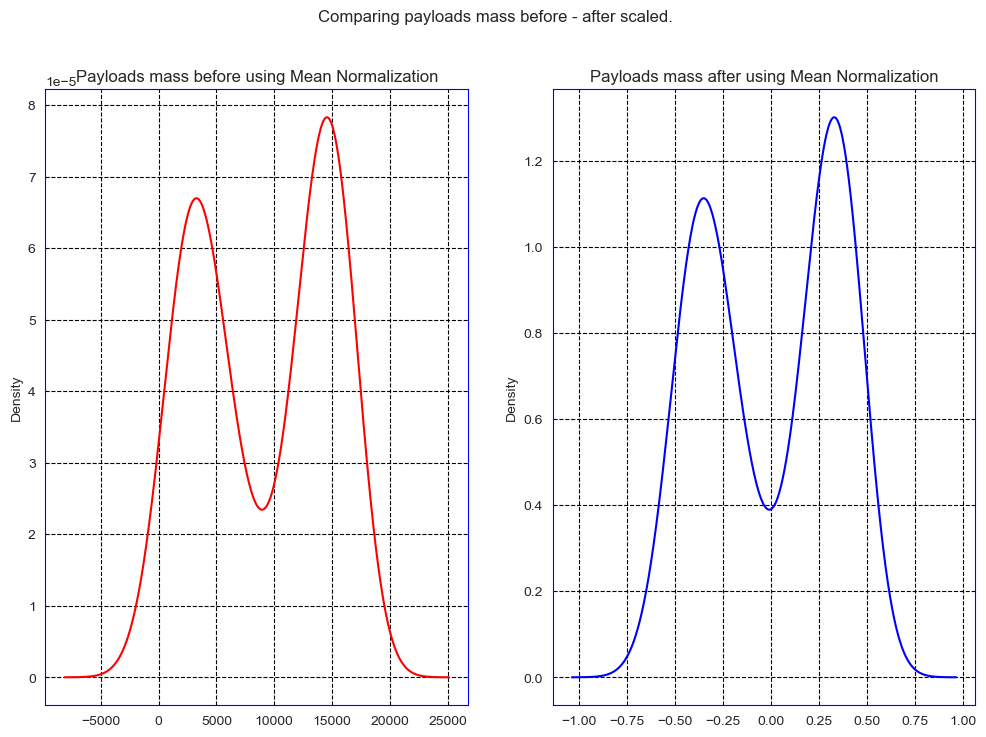

In [111]:
# YOUR CODE HERE
payloads_mass_mean = raw_df["payloads_mass"].mean()
payloads_mass_min = raw_df["payloads_mass"].min()
payloads_mass_max = raw_df["payloads_mass"].max()

raw_df_scaled = (raw_df[["payloads_mass"]] - payloads_mass_mean) / (payloads_mass_max - payloads_mass_min)
raw_df_scaled = pd.DataFrame(raw_df_scaled,  columns=["payloads_mass"])


fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Mean Normalization")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Mean Normalization")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Nhận xét**

- Sau khi áp dụng `Mean Normalization`, hình dạng phân phối của dữ liệu vẫn được giữ nguyên, nhưng phạm vi giá trị đã được điều chỉnh. Trước khi chuẩn hóa, dữ liệu có khoảng từ (-5000, 25000), sau đó được đưa về khoảng (-1, 1). Mật độ của các giá trị cũng thay đổi, nhưng các đỉnh phân phối vẫn giữ nguyên vị trí.

- So sánh hai biểu đồ, ta thấy `Mean Normalization` giúp dữ liệu có trung bình xấp xỉ 0 mà không làm biến dạng phân phối.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

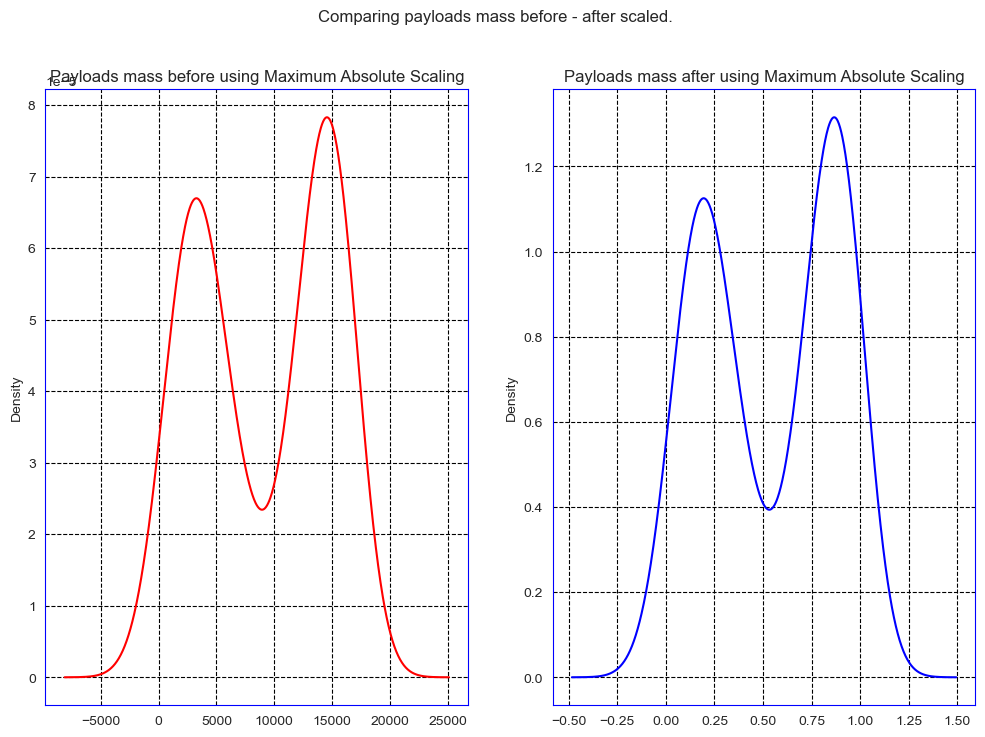

In [112]:
# YOUR CODE HERE
scaler = MaxAbsScaler()
scaler.fit(raw_df[["payloads_mass"]])

raw_df_scaled = scaler.transform(raw_df[["payloads_mass"]])
raw_df_scaled = pd.DataFrame(raw_df_scaled,  columns=["payloads_mass"])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Maximum Absolute Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Maximum Absolute Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Nhận xét**

- Phân bố của cột payloads_mass không thay đổi, nhưng phạm vi bị thu hẹp. Trước chuẩn hóa: (5000, 25000). Sau chuẩn hóa: (-0.5, 1.5).
- Mật độ giá trị tăng lên sau khi chuẩn hóa.
- Trước chuẩn hóa, giá trị có mật độ cao nhất khoảng 14000. Sau chuẩn hóa, tương ứng là 0.9.
- Phương pháp này thu hẹp phạm vi mà không làm thay đổi phân bố. Phạm vi và mật độ sau `Maximum Absolute Scaling` tương tự `Min/Max Scaling`.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

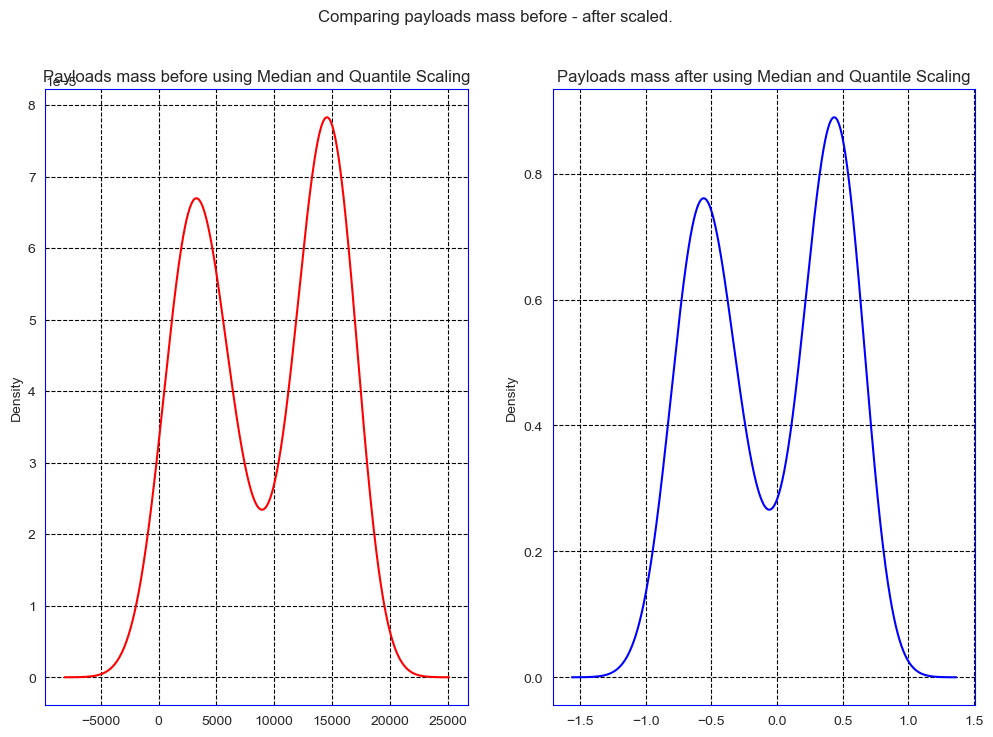

In [113]:
# YOUR CODE HERE
payloads_mass_median = raw_df["payloads_mass"].median()
payloads_mass_25 = raw_df["payloads_mass"].quantile(0.25)
payloads_mass_75 = raw_df["payloads_mass"].quantile(0.75)

raw_df_scaled = (raw_df[["payloads_mass"]] - payloads_mass_median) / (payloads_mass_75 - payloads_mass_25)
raw_df_scaled = pd.DataFrame(raw_df_scaled,  columns=["payloads_mass"])

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Median and Quantile Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Median and Quantile Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Nhận xét**

- Phân bố của payloads_mass không thay đổi sau khi chuẩn hóa. Trước chuẩn hóa: phạm vi giá trị từ khoảng (-5000, 25000). Sau chuẩn hóa: (-2, 1).
- Mật độ giá trị tăng lên sau khi chuẩn hóa.
- Trước chuẩn hóa, giá trị có mật độ cao nhất khoảng 14000. Sau chuẩn hóa, tương ứng là khoảng 0.1.
- Phương pháp này thu hẹp phạm vi nhưng giữ nguyên hình dạng phân bố.
- Phạm vi sau chuẩn hóa nhỏ hơn so với Standardization nhưng rộng hơn các phương pháp khác. Mật độ giá trị trên trục y nhỏ hơn so với các phương pháp chuẩn hóa khác.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

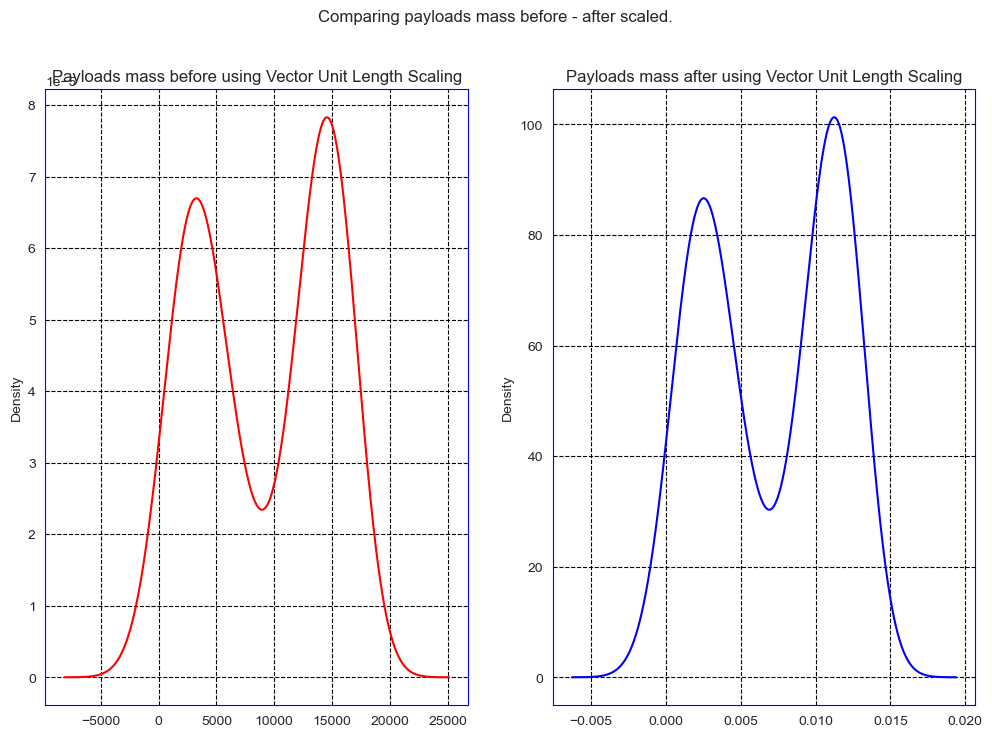

In [114]:
# YOUR CODE HERE
raw_df_scaled = raw_df.copy()

# Tính tổng giá trị tuyệt đối của tất cả phần tử trong cột 'payloads_mass' (L1-norm)
# Công thức L1-norm: ||x||_1 = sum(|x_i|)
magnitude = np.sum(np.abs(raw_df["payloads_mass"]))

# Tránh lỗi chia cho 0
if magnitude != 0:
    # Chuẩn hóa dữ liệu theo phương pháp Unit Vector Transformation
    # x_new = x_old / ||x||
    raw_df_scaled["payloads_mass"] = raw_df["payloads_mass"] / magnitude


fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Vector Unit Length Scaling")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Vector Unit Length Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")
plt.show()

**TODO: After visualizing the results, describe your observation from chart**

**Nhận xét**

- Phân bố của cột payloads_mass không thay đổi, nhưng phạm vi bị thu hẹp. Trước chuẩn hóa: (5000, 25000). Sau chuẩn hóa: (-0.005, 0.02).
- Mật độ giá trị tăng lên sau khi chuẩn hóa.
- Trước chuẩn hóa, giá trị có mật độ cao nhất khoảng 14000. Sau chuẩn hóa, tương ứng là 0.014.
- Phương pháp này thu hẹp phạm vi mà không làm thay đổi phân bố.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

**Khi nào áp dụng?**
- Tránh thiên vị mô hình: Giúp các đặc trưng đóng góp đồng đều, tránh bị chi phối bởi giá trị lớn.
- Giảm Internal Covariate Shift: Ổn định phân phối dữ liệu qua các tầng trong mô hình học sâu.
- Tăng tốc độ hội tụ: Giúp tối ưu nhanh hơn trong các mô hình dùng Gradient Descent.
- Cải thiện tổng quát hóa: Giảm nguy cơ overfitting, giúp mô hình hoạt động tốt trên dữ liệu mới.

**Áp dụng ở đâu?**
- Mô hình học máy & học sâu: Hồi quy, KNN, SVM, K-Means, PCA.
- Xử lý dữ liệu: Khi các đặc trưng có đơn vị đo khác nhau hoặc giá trị chênh lệch lớn.
- Dữ liệu chuỗi thời gian & tài chính: Giúp so sánh dễ hơn.
- Xử lý ảnh: Chuẩn hóa pixel giúp hình ảnh đồng đều hơn.

End of your lab 01.